Psuedocode:

    env = ... # given: some environment object
    Q = random
    for i in range(num_episodes):
        s = env.reset()
        done = False
        while not done:
            a = choose_action(Q,s)
            s`, r, done = env.step(a)

            # Update Q
            y = r + gamma * max_a`{ Q(s`,a`) }
            Q(s,a) = Q(s,a) + learning_rate * (y - Q(s,a))

            # important: update the current state
            s = s`

In [ ]:
!git clone https://github.com/lazyprogrammer/machine_learning_examples.git

fatal: destination path 'machine_learning_examples' already exists and is not an empty directory.


In [ ]:
!git clone https://github.com/openai/gym.git

Cloning into 'gym'...
remote: Enumerating objects: 10906, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 10906 (delta 7), reused 14 (delta 4), pack-reused 10884
Receiving objects: 100% (10906/10906), 4.17 MiB | 21.57 MiB/s, done.
Resolving deltas: 100% (7380/7380), done.
ERROR: File "setup.py" not found. Directory cannot be installed in editable mode: /content


In [ ]:
!cd gym && pip install -e .

Obtaining file:///content/gym
  Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3
  Running setup.py develop for gym


In [ ]:
import gym

In [ ]:
env = gym.make('CartPole-v0')

In [ ]:
env.reset()

array([ 0.02238998, -0.02892902, -0.04687467, -0.00588798])

In [ ]:
box = env.observation_space

In [ ]:
box.__dir__()

['dtype',
 'shape',
 'low',
 'high',
 'bounded_below',
 'bounded_above',
 '_np_random',
 '__module__',
 '__doc__',
 '__init__',
 'is_bounded',
 'sample',
 'contains',
 'to_jsonable',
 'from_jsonable',
 '__repr__',
 '__eq__',
 '__hash__',
 'np_random',
 'seed',
 '__contains__',
 '__dict__',
 '__weakref__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [ ]:
env.action_space

Discrete(2)

In [ ]:
env.action_space.__dir__()

['n',
 'shape',
 'dtype',
 '_np_random',
 '__module__',
 '__doc__',
 '__init__',
 'sample',
 'contains',
 '__repr__',
 '__eq__',
 '__hash__',
 'np_random',
 'seed',
 '__contains__',
 'to_jsonable',
 'from_jsonable',
 '__dict__',
 '__weakref__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [ ]:
done = False
iter = 0
while not done:
  observation, reward, done, _ = env.step(env.action_space.sample())
  iter += 1
print(iter)

32


In [ ]:
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_action(s,w):
  return 1 if s.dot(w) > 0 else 0

In [ ]:
def play_one_episode(env, params):
  observation = env.reset()
  done = False
  t = 0

  while not done and t < 10000:
    #env.render()
    t += 1
    action = get_action(observation, params)
    observation, reward, done, info = env.step(action)
    if done:
      break
  
  return t

In [ ]:
def play_multiple_episodes(env, T, params):
  episode_lengths = np.empty(T)

  for i in range(T):
    episode_lengths[i] = play_one_episode(env, params)
  
  avg_length = episode_lengths.mean()
  print("avg_length: ", avg_length)
  return avg_length

In [ ]:
def random_search(env, iters):
  episode_lengths = []
  best = 0
  params = None
  for t in range(100):
    new_params = np.random.random(4)*2 - 1
    avg_length = play_multiple_episodes(env, iters, new_params)
    episode_lengths.append(avg_length)

    if avg_length > best:
      params = new_params
      best = avg_length
  
  return episode_lengths, params


avg_length:  9.452
avg_length:  149.828
avg_length:  40.87
avg_length:  9.652
avg_length:  9.438
avg_length:  23.114
avg_length:  92.714
avg_length:  9.756
avg_length:  177.97
avg_length:  96.936
avg_length:  37.256
avg_length:  9.186
avg_length:  24.81
avg_length:  55.822
avg_length:  21.342
avg_length:  146.218
avg_length:  9.094
avg_length:  8.808
avg_length:  54.46
avg_length:  180.204
avg_length:  9.694
avg_length:  8.95
avg_length:  95.714
avg_length:  48.624
avg_length:  54.164
avg_length:  9.382
avg_length:  74.298
avg_length:  9.038
avg_length:  9.244
avg_length:  9.626
avg_length:  114.452
avg_length:  99.582
avg_length:  96.298
avg_length:  114.152
avg_length:  8.882
avg_length:  80.06
avg_length:  88.596
avg_length:  8.85
avg_length:  9.48
avg_length:  106.634
avg_length:  8.834
avg_length:  18.576
avg_length:  100.118
avg_length:  35.832
avg_length:  9.032
avg_length:  8.846
avg_length:  143.722
avg_length:  9.716
avg_length:  9.434
avg_length:  89.022
avg_length:  52.036


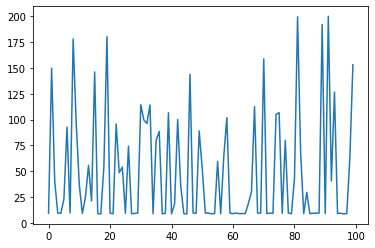

In [ ]:
env = gym.make('CartPole-v0')
episode_lengths, params = random_search(env, 500)
plt.plot(episode_lengths)

In [ ]:
play_multiple_episodes(env, 100, params)

avg_length:  200.0


200.0

In [ ]:
# if we want to 'watch' the agent

# import gym
# from gym import wrappers
# env = gym.make('CartPole-v0')
# env = wrappers.Monitor(env, 'agent_in_action')

#proceed with learning

In [ ]:
import os
import sys
import pandas as pd
from datetime import datetime

In [ ]:
def build_state(features):
  return int("".join(map(lambda feature: str(int(feature)), features)))

In [ ]:
def to_bin(value, bins):
  return np.digitize(x=[value], bins=bins)[0]

In [ ]:
class FeatureTransformer:
  def __init__(self):
    self.cart_position_bins = np.linspace(-2.4,2.4,9)
    self.cart_velocity_bins = np.linspace(-2,2,9)
    self.pole_angle_bins = np.linspace(-0.4,0.4,9)
    self.pole_velocity_bins = np.linspace(-3.5,3.5,9)

  def transform(self, observation):
    #returns an int
    cart_pos, cart_vel, pole_angle, pole_vel = observation
    return build_state([
                        to_bin(cart_pos, self.cart_position_bins),
                        to_bin(cart_vel, self.cart_velocity_bins),
                        to_bin(pole_angle, self.pole_angle_bins),
                        to_bin(pole_vel, self.pole_velocity_bins)
    ])

In [ ]:
class Model:
  def __init__(self, env, feature_transformer):
    self.env = env
    self.feature_transformer = feature_transformer

    num_states = 10**env.observation_space.shape[0]
    num_actions = env.action_space.n
    self.Q = np.random.uniform(low=1, high=1, size=(num_states, num_actions))

  def predict(self, s):
    x = self.feature_transformer.transform(s)
    return self.Q[x]

  def update(self, s, a, G):
    x = self.feature_transformer.transform(s)
    self.Q[x,a] += 10e-3*(G - self.Q[x,a])
  
  def sample_action(self, s, eps):
    if np.random.random() < eps:
      return self.env.action_space.sample()
    else:
      p = self.predict(s)
      return np.argmax(p)

In [ ]:
def play_one(model, eps, gamma):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0
  while not done and iters < 10000:
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)

    totalreward += reward

    if done and iters<199:
      reward -= 300
    
    #update model
    G = reward + gamma*np.max(model.predict(observation))
    model.update(prev_observation, action, G)

    iters += 1

  return totalreward

In [ ]:
def plot_running_avg(totalrewards):
  N = len(totalrewards)
  running_avg = np.empty(N)
  for t in range(N):
    running_avg[t] = totalrewards[max(0, t-100):(t+1)].mean()
  plt.plot(running_avg)

episode:  0  total reward:  30.0  eps:  1.0
episode:  100  total reward:  51.0  eps:  0.09950371902099892
episode:  200  total reward:  72.0  eps:  0.07053456158585983
episode:  300  total reward:  53.0  eps:  0.0576390417704235
episode:  400  total reward:  49.0  eps:  0.04993761694389223
episode:  500  total reward:  109.0  eps:  0.04467670516087703
episode:  600  total reward:  120.0  eps:  0.04079085082240021
episode:  700  total reward:  132.0  eps:  0.0377694787300249
episode:  800  total reward:  119.0  eps:  0.03533326266687867
episode:  900  total reward:  41.0  eps:  0.03331483023263848
episode:  1000  total reward:  119.0  eps:  0.0316069770620507
episode:  1100  total reward:  107.0  eps:  0.03013743873394561
episode:  1200  total reward:  106.0  eps:  0.028855492841238062
episode:  1300  total reward:  119.0  eps:  0.027724348650071385
episode:  1400  total reward:  45.0  eps:  0.02671658425726324
episode:  1500  total reward:  200.0  eps:  0.025811286645983367
episode:  1

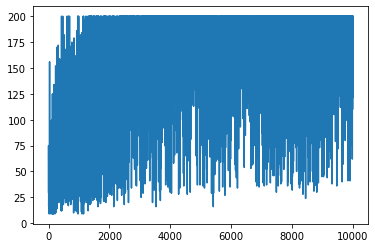

In [ ]:
env = gym.make('CartPole-v0')
ft = FeatureTransformer()
model = Model(env, ft)
gamma = 0.9
N = 10000
totalrewards = np.empty(N)
for n in range(N):
  eps = 1.0/np.sqrt(n+1)
  totalreward = play_one(model, eps, gamma)
  totalrewards[n] = totalreward
  if n % 100 == 0:
    print("episode: ", n, " total reward: ", totalreward, " eps: ", eps)
print("avg reward for last 100 episodes: ", totalrewards[-100:].mean())
print("total steps: ", totalrewards.sum())

plt.plot(totalrewards)

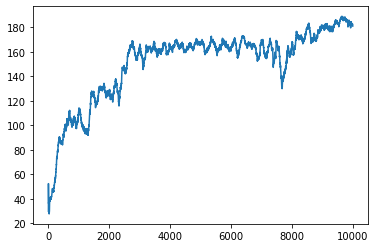

In [ ]:
plot_running_avg(totalrewards)

In [ ]:
from __future__ import print_function, division
from builtins import range

import gym
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gym import wrappers
from datetime import datetime
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDRegressor

In [ ]:
class FeatureTransformer:
  def __init__(self, env):
    observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
    scaler = StandardScaler()
    scaler.fit(observation_examples)

    featurizer = FeatureUnion([
                        ("rbf1", RBFSampler(gamma=5.0, n_components=500)),
                        ("rbf2", RBFSampler(gamma=2.0, n_components=500)),
                        ("rbf3", RBFSampler(gamma=1.0, n_components=500)),
                        ("rbf4", RBFSampler(gamma=0.5, n_components=500))       
    ])
    featurizer.fit(scaler.transform(observation_examples))

    self.scaler = scaler
    self.featurizer = featurizer
  
  def transform(self, observations):
    scaled = self.scaler.transform(observations)

    return self.featurizer.transform(scaled)

In [ ]:
class Model:
  def __init__(self, env, feature_transformer, learning_rate):
    self.env = env
    self.models = []
    self.feature_transformer = feature_transformer
    for i in range(env.action_space.n):
      model = SGDRegressor(learning_rate=learning_rate)
      model.partial_fit(feature_transformer.transform( [env.reset()] ), [0])
      self.models.append(model)
  
  def predict(self, s):
    X = self.feature_transformer.transform([s])
    assert(len(X.shape) == 2)
    return np.array([m.predict(X)[0] for m in self.models])
  
  def update(self, s, a, G):
    X = self.feature_transformer.transform([s])
    assert(len(X.shape) == 2)
    self.models[a].partial_fit(X, [G])

  def sample_action(self, s, eps):
    if np.random.random() < eps:
      return self.env.action_space.sample()
    else:
      return np.argmax(self.predict(s))

In [ ]:
def play_one(model, env, eps, gamma):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0
  while not done and iters < 10000:
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)

    G = reward + gamma*np.max(model.predict(observation)[0])
    model.update(prev_observation, action, G)

    totalreward += reward
    iters += 1

  return totalreward

In [ ]:
def plot_cost_to_go(env, estimator, num_tiles=20):
  x = np.linspace(env.observation_space.low[0], env.observation_space.high[0])
  y = np.linspace(env.observation_space.low[1], env.observation_space.high[1])
  X, Y = np.meshgrid(x,y)

  Z = np.apply_along_axis(lambda _: -np.max(estimator.predict(_)), 2, np.dstack([X,Y]))

  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(111, projection='3d')
  surf = ax.plot_surface(X,Y,Z,
                         rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, vmin=-1.0, vmax=1.0)
  ax.set_xlabel('Position')
  ax.set_ylabel('Velocity')
  ax.set_zlabel('Cost-to-Go == -V(s)')
  ax.set_title("Cost-to-Go Function")
  fig.colorbar(surf)
  plt.show()

In [ ]:
def plot_running_avg(totalrewards):
  N = len(totalrewards)
  running_avg = np.empty(N)
  for t in range(N):
    running_avg[t] = totalrewards[max(0, t-100):(t+1)].mean()
  plt.plot(running_avg)
  plt.title("Running Average")
  plt.show()

In [ ]:
env = gym.make('MountainCar-v0')
ft = FeatureTransformer(env)
model = Model(env, ft, "constant")
gamma = 0.99

N = 300
totalrewards = np.empty(N)
for n in range(N):
  eps = 0.1*(0.97**n)
  if n == 199:
    print("eps: ", eps)
  totalreward = play_one(model, env, eps, gamma)
  totalrewards[n] = totalreward
  if (n + 1) % 100 == 0:
    print("episode: ", n, " total reward: ", totalreward)

print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
print("total steps:", -totalrewards.sum())

episode:  99  total reward:  -184.0
eps:  0.00023311762989647067
episode:  199  total reward:  -85.0
episode:  299  total reward:  -148.0
avg reward for last 100 episodes: -130.29
total steps: 44000.0


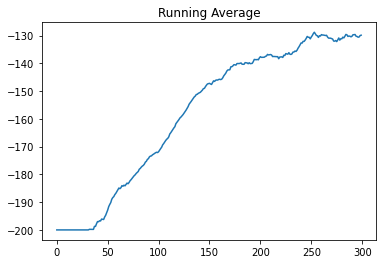

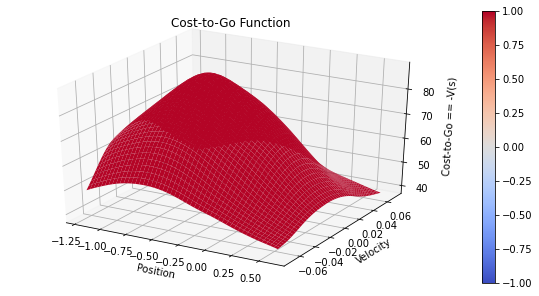

In [ ]:
plot_running_avg(totalrewards)

# plot the optimal state-value function
plot_cost_to_go(env, model)

In [1]:
from __future__ import print_function, division
from builtins import range

import gym
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from gym import wrappers
from datetime import datetime
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler

In [30]:
class SGDRegressor:
  def __init__(self, D):
    self.w = np.random.randn(D) / np.sqrt(D)
    self.lr = 0.1

  def partial_fit(self, X, Y):
    self.w += self.lr * (Y - X.dot(self.w)).dot(X)
  
  def predict(self, X):
    return X.dot(self.w)

In [3]:
class FeatureTransformer:
  def __init__(self, env):
    observation_examples = np.random.random((20000, 4))*2 - 1
    scaler = StandardScaler()
    scaler.fit(observation_examples)

    featurizer = FeatureUnion([
                               ('rbf1', RBFSampler(gamma = 0.05, n_components = 1000)),
                               ('rbf2', RBFSampler(gamma = 1.0, n_components = 1000)),
                               ('rbf3', RBFSampler(gamma = 0.5, n_components = 1000)),
                               ('rbf4', RBFSampler(gamma = 0.1, n_components = 1000))
    ])
    feature_examples = featurizer.fit_transform(scaler.transform(observation_examples))

    self.dimensions = feature_examples.shape[1]
    self.scaler = scaler
    self.featurizer = featurizer

  def transform(self, observations):
    scaled = self.scaler.transform(observations)
    return self.featurizer.transform(scaled)

In [25]:
class Model:
  def __init__(self, env, feature_transformer):
    self.env = env
    self.models = []
    self.feature_transformer = feature_transformer
    for i in range(env.action_space.n):
      model = SGDRegressor(feature_transformer.dimensions)
      self.models.append(model)

  def predict(self, s):
    X = self.feature_transformer.transform(np.atleast_2d(s))
    result = np.stack([m.predict(X) for m in self.models]).T
    return result
  
  def update(self, s, a, G):
    X = self.feature_transformer.transform(np.atleast_2d(s))
    self.models[a].partial_fit(X, [G])

  def sample_action(self, s, eps):
    if np.random.random() < eps:
      return self.env.action_space.sample()
    else:
      return np.argmax(self.predict(s))

In [87]:
def play_one(env, model, eps, gamma):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0
  while not done and iters < 2000:
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)

    if done:
      reward -= 200
    
    pred = model.predict(observation)
    next = pred[np.argmax(model.predict(observation))]
    print(next.shape)
    print(env.action_space.n)
    assert(next.shape == (1,env.action_space.n))
    G = reward + gamma*np.max(next)
    model.update(prev_observation, action, G)

    if reward == 1:
      totalreward += reward
    iters += 1
  
  return totalreward

In [27]:
def plot_running_avg(totalrewards):
  N = len(totalrewards)
  running_avg = np.empty(N)
  for t in range(N):
    running_avg[t] = totalrewards[max(0, t-100):(t+1)].mean()
  plt.plot(running_avg)
  plt.title("Running Average")
  plt.show()

episode:  0  total reward:  25.0  eps:  1.0  avg reward (last 100):  25.0
episode:  100  total reward:  199.0  eps:  0.09950371902099892  avg reward (last 100):  84.35643564356435
episode:  200  total reward:  137.0  eps:  0.07053456158585983  avg reward (last 100):  167.0990099009901
episode:  300  total reward:  166.0  eps:  0.0576390417704235  avg reward (last 100):  165.4257425742574
episode:  400  total reward:  183.0  eps:  0.04993761694389223  avg reward (last 100):  150.32673267326732
avg reward for last 100 episodes: 168.42
total steps: 73445.0


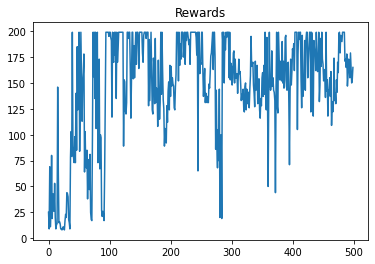

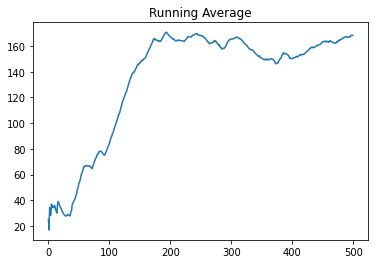

In [31]:
# main
env = gym.make('CartPole-v0')
ft = FeatureTransformer(env)
model = Model(env, ft)
gamma = 0.99

N = 500
totalrewards = np.empty(N)
costs = np.empty(N)
for n in range(N):
  eps = 1.0/np.sqrt(n+1)
  totalreward = play_one(env, model, eps, gamma)
  totalrewards[n] = totalreward
  if n % 100 == 0:
    print("episode: ", n, " total reward: ", totalreward, " eps: ", eps, " avg reward (last 100): ", totalrewards[max(0, n-100):(n+1)].mean())
  
print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
print("total steps:", totalrewards.sum())

plt.plot(totalrewards)
plt.title("Rewards")
plt.show()

plot_running_avg(totalrewards)

Finally, Tensorflow!

In [33]:
from __future__ import print_function, division
from builtins import range

import numpy as np
import tensorflow as tf

In [54]:
class SGDRegressor:
  def __init__(self, D):
    print("Hello Tensorflow!")
    lr = 0.1

    self.w = tf.Variable(tf.random.normal(shape=(D,1)), name = 'w')
    self.X = tf.compat.v1.placeholder(tf.float32, shape=(None, D), name = 'X')
    self.Y = tf.compat.v1.placeholder(tf.float32, shape=(None,), name = 'Y')

    Y_hat = tf.reshape(tf.matmul(self.X, self.w), [-1])
    delta = self.Y - Y_hat
    cost = tf.reduce_sum(delta * delta)

    self.train_op = tf.compat.v1.train.GradientDescentOptimizer(lr).minimize(cost)
    self.predict_op = Y_hat

    init = tf.compat.v1.global_variables_initializer()
    self.session = tf.compat.v1.InteractiveSession()
    self.session.run(init)

  def partial_fit(self, X, Y):
    self.session.run(self.train_op, feed_dict = {self.X:X, self.Y:Y})

  def predict(self, X):
    return self.session.run(self.predict_op, feed_dict = {self.X:X})

Hello Tensorflow!
Hello Tensorflow!


/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


episode:  0  total reward:  10.0  eps:  1.0  avg reward (last 100):  10.0
episode:  100  total reward:  163.0  eps:  0.09950371902099892  avg reward (last 100):  126.73267326732673
episode:  200  total reward:  140.0  eps:  0.07053456158585983  avg reward (last 100):  175.4950495049505
episode:  300  total reward:  199.0  eps:  0.0576390417704235  avg reward (last 100):  185.990099009901
episode:  400  total reward:  186.0  eps:  0.04993761694389223  avg reward (last 100):  195.73267326732673
avg reward for last 100 episodes: 194.3
total steps: 87821.0


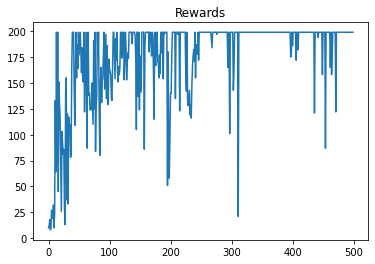

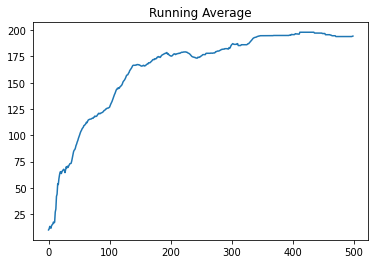

In [55]:
# main
env = gym.make('CartPole-v0')
ft = FeatureTransformer(env)
tf.compat.v1.disable_eager_execution()
model = Model(env, ft)
gamma = 0.99

N = 500
totalrewards = np.empty(N)
costs = np.empty(N)
for n in range(N):
  eps = 1.0/np.sqrt(n+1)
  totalreward = play_one(env, model, eps, gamma)
  totalrewards[n] = totalreward
  if n % 100 == 0:
    print("episode: ", n, " total reward: ", totalreward, " eps: ", eps, " avg reward (last 100): ", totalrewards[max(0, n-100):(n+1)].mean())
  
print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
print("total steps:", totalrewards.sum())

plt.plot(totalrewards)
plt.title("Rewards")
plt.show()

plot_running_avg(totalrewards)

In [57]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [93]:
class Model:
  def __init__(self, env, feature_transformer):
    self.env = env
    self.models = []
    self.feature_transformer = feature_transformer
    for i in range(env.action_space.n):
      model = Sequential()
      model.add(Dense(8, activation='relu'))
      model.add(Dense(16, activation='relu'))
      model.add(Dense(64, activation='relu'))
      model.add(Dense(2, activation='sigmoid'))
      opt = tf.keras.optimizers.SGD(nesterov=True)
      model.compile(loss = 'mse', optimizer=opt)
      self.models.append(model)

  def predict(self, s):
    X = self.feature_transformer.transform(np.atleast_2d(s))
    result = np.stack([m.predict(X) for m in self.models]).T
    return result
  
  def update(self, s, a, G):
    X = self.feature_transformer.transform(np.atleast_2d(s))
    self.models[a].fit(X, [G])

  def sample_action(self, s, eps):
    if np.random.random() < eps:
      return self.env.action_space.sample()
    else:
      return np.argmax(self.predict(s))

In [81]:
class FeatureTransformer:
  def __init__(self, env):
    observation_examples = np.random.random((20000, 4))*2 - 1
    scaler = StandardScaler()
    scaler.fit(observation_examples)

    feature_examples = scaler.transform(observation_examples)

    self.dimensions = feature_examples.shape[1]
    self.scaler = scaler

  def transform(self, observations):
    return self.scaler.transform(observations)

In [94]:
# main
env = gym.make('CartPole-v0')
ft = FeatureTransformer(env)
tf.compat.v1.disable_eager_execution()
model = Model(env, ft)
gamma = 0.99

N = 500
totalrewards = np.empty(N)
costs = np.empty(N)
for n in range(N):
  eps = 1.0/np.sqrt(n+1)
  totalreward = play_one(env, model, eps, gamma)
  totalrewards[n] = totalreward
  if n % 100 == 0:
    print("episode: ", n, " total reward: ", totalreward, " eps: ", eps, " avg reward (last 100): ", totalrewards[max(0, n-100):(n+1)].mean())
  
print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
print("total steps:", totalrewards.sum())

plt.plot(totalrewards)
plt.title("Rewards")
plt.show()

plot_running_avg(totalrewards)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


IndexError: ignored